In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from matplotlib import pyplot as plt
import tensorflow as tf
import joblib as jl
import numpy as np
import cv2
import os

print(f'numpy version : {np.__version__}')
print(f'tensorflow version : {tf.__version__}')

numpy version : 1.18.5
tensorflow version : 2.3.1


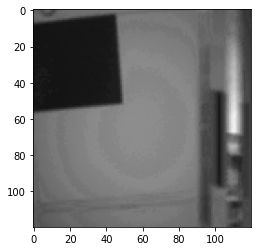

In [2]:
path0111_11 = '../ML/images/train/0111/0111_11.bmp'
img = image.load_img(path0111_11)
plt.imshow(img)

In [3]:
img0111_11 = cv2.imread(path0111_11)
img0111_11.shape

(120, 120, 3)

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory('../ML/images/train/', 
                                          target_size=(120, 120),
                                          batch_size=3)
validation_dataset = validation.flow_from_directory('../ML/images/validation/', 
                                            target_size=(120, 120),
                                            batch_size=3)

Found 544 images belonging to 16 classes.
Found 136 images belonging to 16 classes.


In [5]:
train_dataset.class_indices

{'0000': 0,
 '0001': 1,
 '0010': 2,
 '0011': 3,
 '0100': 4,
 '0101': 5,
 '0110': 6,
 '0111': 7,
 '1000': 8,
 '1001': 9,
 '1010': 10,
 '1011': 11,
 '1100': 12,
 '1101': 13,
 '1110': 14,
 '1111': 15}

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (120, 120, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (120, 120, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.15),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(16,activation='softmax')
                                   ])


In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [8]:
model.fit(train_dataset,
          steps_per_epoch=3,
          epochs=16,
          validation_data=validation_dataset)


Epoch 1/16
3/3 [==============================] - 0s 155ms/step - loss: 2.9950 - accuracy: 0.1111 - val_loss: 2.7689 - val_accuracy: 0.2353
Epoch 2/16
3/3 [==============================] - 0s 120ms/step - loss: 2.6432 - accuracy: 0.2222 - val_loss: 2.7170 - val_accuracy: 0.1691
Epoch 3/16
3/3 [==============================] - 0s 130ms/step - loss: 2.7152 - accuracy: 0.1111 - val_loss: 2.6731 - val_accuracy: 0.1691
Epoch 4/16
3/3 [==============================] - 0s 119ms/step - loss: 2.8277 - accuracy: 0.2222 - val_loss: 2.5734 - val_accuracy: 0.2353
Epoch 5/16
3/3 [==============================] - 0s 105ms/step - loss: 2.4593 - accuracy: 0.3333 - val_loss: 2.5045 - val_accuracy: 0.2279
Epoch 6/16
3/3 [==============================] - 0s 111ms/step - loss: 2.1668 - accuracy: 0.4444 - val_loss: 2.4103 - val_accuracy: 0.2353
Epoch 7/16
3/3 [==============================] - 0s 109ms/step - loss: 1.7832 - accuracy: 0.2222 - val_loss: 2.3269 - val_accuracy: 0.3676
Epoch 8/16
3/3 [====

In [9]:
model.save('model_datacom_2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_datacom_2/assets


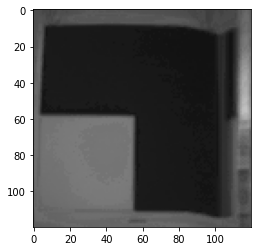

In [20]:
# test_path = '../ML/images/train/0101/0101__5.bmp'
test_path = '../ML/images/train/0010/0010_19.bmp'
test_img = image.load_img(test_path)
plt.imshow(test_img)

In [21]:
array_test_img = image.img_to_array(test_img)
array_test_img = np.expand_dims(array_test_img,axis=0)
target = np.vstack([array_test_img])
val = model.predict(target)
print(val[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [22]:
val[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [23]:
model.predict_classes(target)

array([10])

In [15]:
model.evaluate(validation_dataset)

46/46 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.9265


[0.2812316119670868, 0.9264705777168274]